In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
irisdf = pd.read_csv('iris.csv')
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = irisdf.drop('species',axis=1)

In [4]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
scaler = MinMaxScaler()
# transform data
XS = scaler.fit_transform(X)
# XS.head()
XS[1:5]

array([[0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [6]:
#Finding the optimum number of clusters for k-means clustering
wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 99)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)

c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

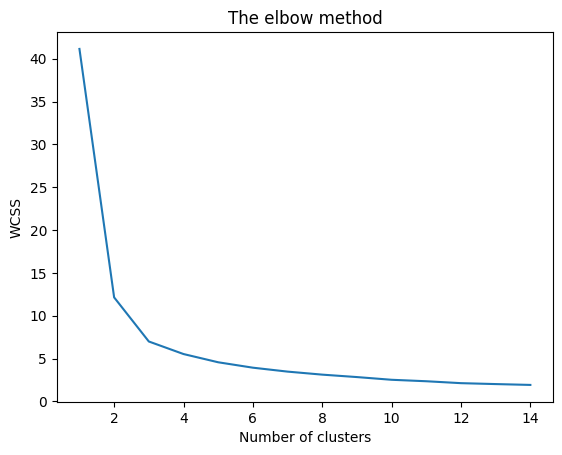

In [7]:
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(XS)

c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

#### Plotting any two features for visualization

Text(0.5, 1.0, 'The actual dataset')

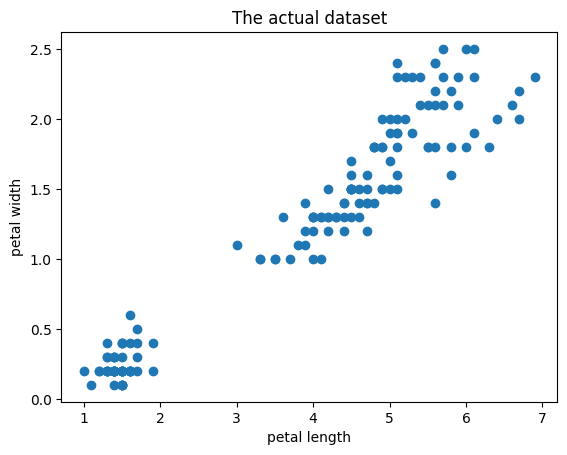

In [10]:
plt.scatter(x=X.petal_length,y=X.petal_width)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title("The actual dataset")

Text(0.5, 1.0, 'The dataset post clustering')

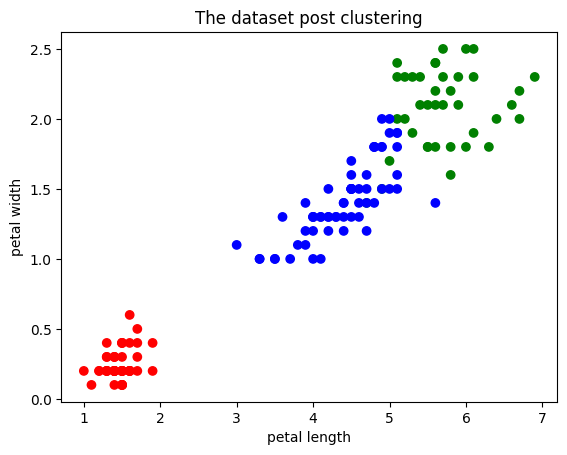

In [11]:
#After the clustering
#adding the colors
color2=np.array(['green','red','blue'])
plt.scatter(x=X.petal_length,y=X.petal_width,c=color2[kmeans.labels_])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title("The dataset post clustering")

#### Another Visual

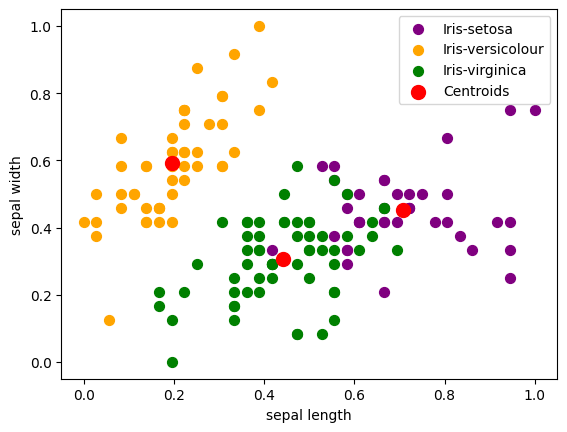

In [12]:
#Visualising the clusters
plt.scatter(XS[Y == 0, 0], XS[Y == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(XS[Y == 1, 0], XS[Y == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(XS[Y == 2, 0], XS[Y == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### More Analysis to find distinguishing and interesting features in each cluster. You can also use good visualizations to show differences

In [13]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]

In [14]:
C1['petal_length'].mean()

5.702564102564101

<AxesSubplot:>

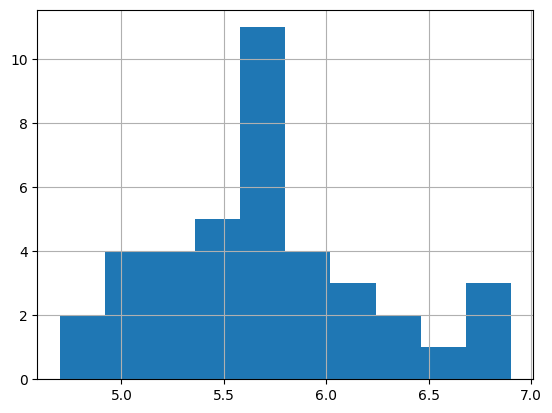

In [15]:
C1['petal_length'].hist()

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

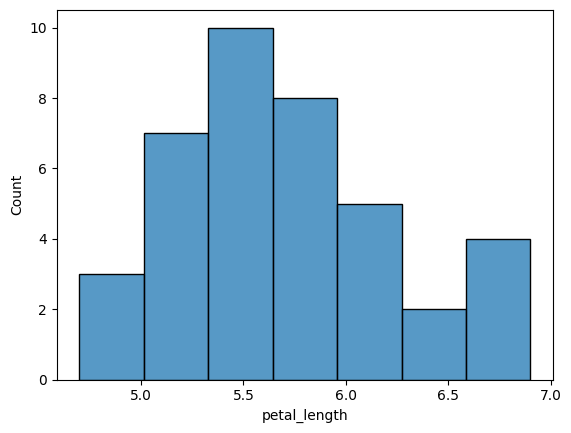

In [16]:
sns.histplot(data=C1, x="petal_length")

In [17]:
C2['petal_length'].mean()

1.464

<AxesSubplot:>

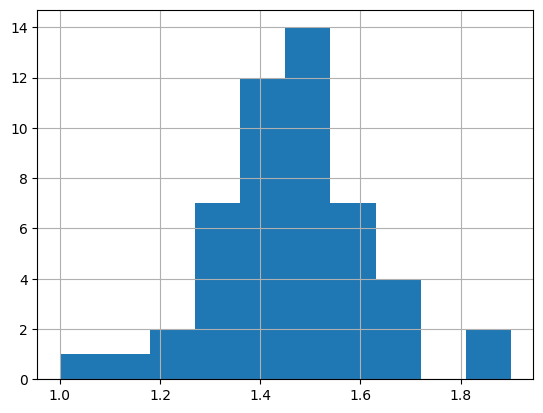

In [18]:
C2['petal_length'].hist()

In [19]:
C3['petal_length'].mean()

4.39672131147541

<AxesSubplot:>

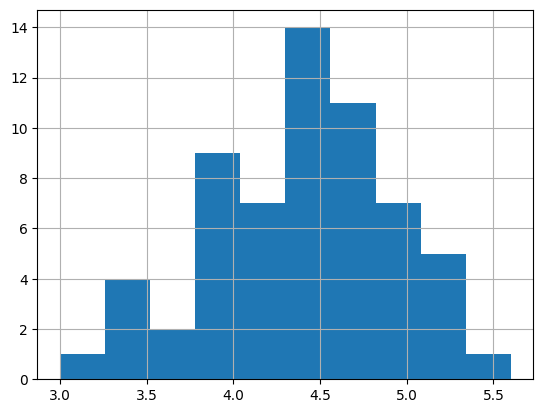

In [20]:
C3['petal_length'].hist()

#### C1 can be named as Big Blossoms, C2 can be named as Tiny Shiny etc.

In [21]:
C1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,39.000000,39.000000,39.000000,39.000000
mean,6.846154,3.082051,5.702564,2.079487
std,0.502544,0.279917,0.519355,0.281144
min,5.800000,2.500000,4.700000,1.400000
25%,6.450000,2.950000,5.350000,1.850000
50%,6.700000,3.000000,5.600000,2.100000
75%,7.200000,3.200000,6.000000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [22]:
C2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [23]:
C3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,61.000000,61.000000,61.000000,61.000000
mean,5.888525,2.737705,4.396721,1.418033
std,0.448738,0.293351,0.526930,0.272341
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.500000,4.000000,1.300000
50%,5.900000,2.800000,4.500000,1.400000
75%,6.200000,3.000000,4.800000,1.500000
max,6.800000,3.400000,5.600000,2.000000
